In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras import Sequential
from keras.api.layers import Dense, Dropout
from keras.api.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

train.shape, test.shape

((23518, 190), (5880, 190))

In [3]:
y_train = train['actual']
X_train = train.drop(columns=['run', 'crossing_id', 'EPC', 'actual', 'xstat', 'xmoving', 'keep_out'])

y_test = test['actual']
X_test = test.drop(columns=['run', 'crossing_id', 'EPC', 'actual', 'xstat', 'xmoving', 'keep_out'])

In [4]:
X_train.shape, X_test.shape

((23518, 183), (5880, 183))

In [5]:
def binarize_label(input_label: str) -> int:
	return 1 if input_label == 'stationary' else 0

In [6]:
y_train = y_train.apply(binarize_label)

y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: actual, dtype: int64

In [7]:
y_test = y_test.apply(binarize_label)

y_test.head()

0    0
1    1
2    0
3    0
4    1
Name: actual, dtype: int64

In [8]:
y_train = to_categorical(y_train)
y_train.shape

(23518, 2)

In [9]:
y_test = to_categorical(y_test)
y_test.shape

(5880, 2)

In [16]:
model = Sequential()
model.add(Dense(64, input_shape=(183,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
# model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100


c:\Users\cbouton\Documents\PERSO\CODE\GIT PROJECTS\RFID-tags-detection\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6808 - loss: 0.5910 - val_accuracy: 0.9558 - val_loss: 0.2123
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9384 - loss: 0.2196 - val_accuracy: 0.9664 - val_loss: 0.1008
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9565 - loss: 0.1360 - val_accuracy: 0.9747 - val_loss: 0.0792
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9670 - loss: 0.1035 - val_accuracy: 0.9785 - val_loss: 0.0646
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9722 - loss: 0.0884 - val_accuracy: 0.9811 - val_loss: 0.0567
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9770 - loss: 0.0758 - val_accuracy: 0.9819 - val_loss: 0.0498
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9768 - loss: 0.0746 - val_accuracy: 0.9843 - val_loss: 0.0446
Epoch 8/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9792 - loss: 0.0665 - val_accuracy: 0.9841

In [17]:
y_pred = model.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred_labels))

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4014
           1       0.99      0.98      0.98      1866

    accuracy                           0.99      5880
   macro avg       0.99      0.99      0.99      5880
weighted avg       0.99      0.99      0.99      5880



In [18]:
print(f"{round(accuracy_score(np.argmax(y_test, axis=1), y_pred_labels)*100, 2)}%")

99.03%


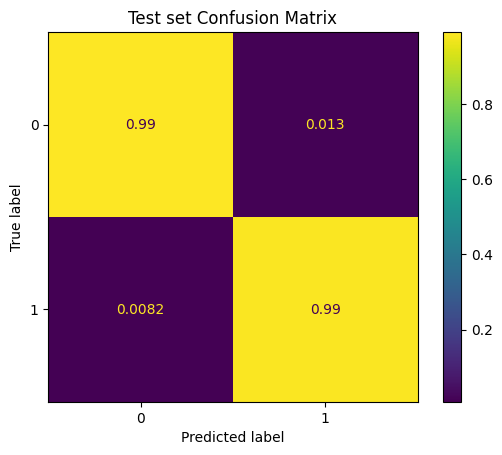

In [19]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_labels, normalize='pred')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Test set Confusion Matrix')
plt.show()

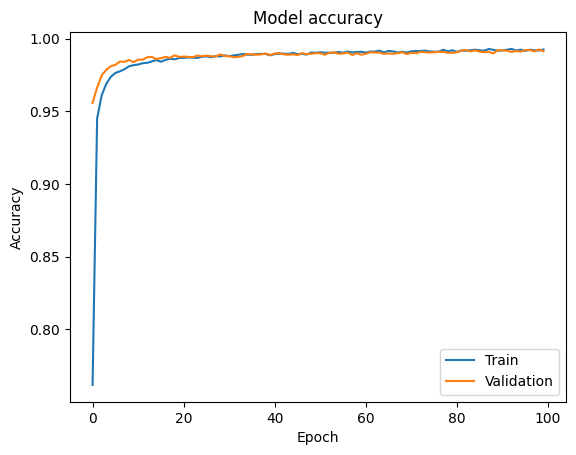

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

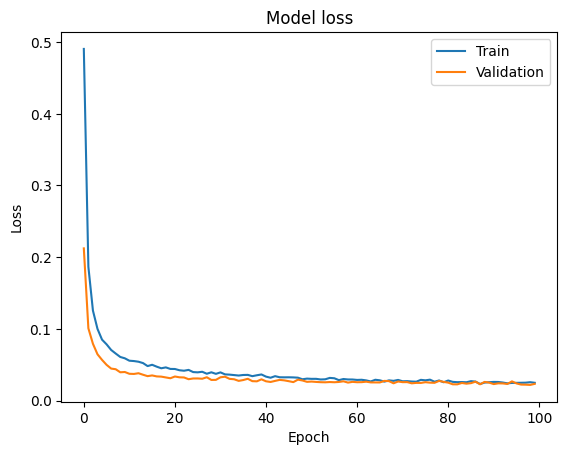

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Great accuracy, no over/underfitting.